In [1]:
%pip install umap-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

from sklearn.decomposition import FastICA, NMF, KernelPCA, PCA
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import SpectralEmbedding
import seaborn as sns
import umap

from adjustText import adjust_text
from itertools import combinations

In [8]:
df = pd.read_csv('authors.csv').rename(columns = {'Unnamed: 0': 'Author'})
X = df.copy().drop(['Author','BookID'], axis=1)
authors = df['Author'].values  # n_samples-length array

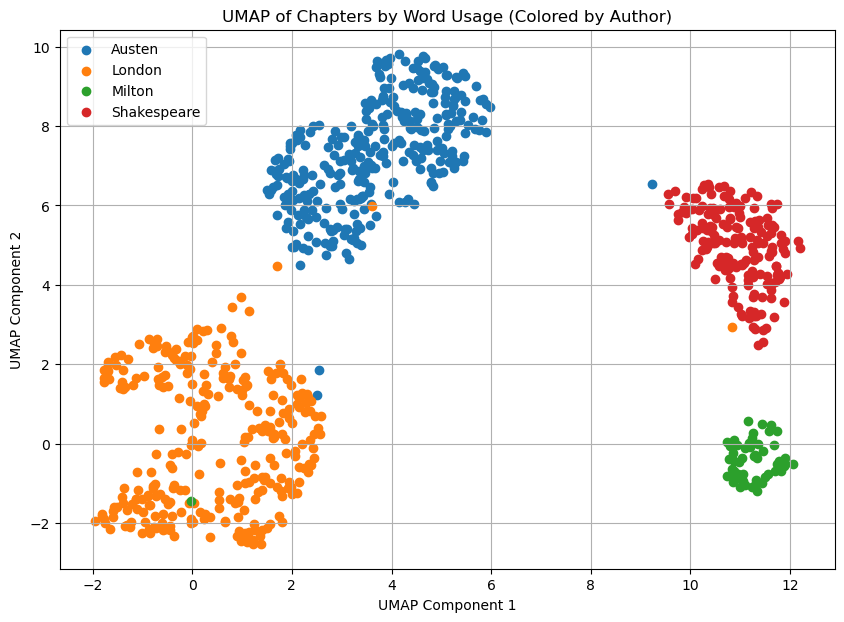

In [22]:
random_state=None

# Step 1: Convert to NumPy
X_chapters = X.to_numpy()

# Step 2: Fit UMAP
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, n_jobs=-1)

X_umap = umap_model.fit_transform(X_chapters)

# Step 3: Plot chapters with author labels
plt.figure(figsize=(10, 7))
for author in ['Austen', 'London', 'Milton', 'Shakespeare']:
    mask = (authors == author)
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1], label=author)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP of Chapters by Word Usage (Colored by Author)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


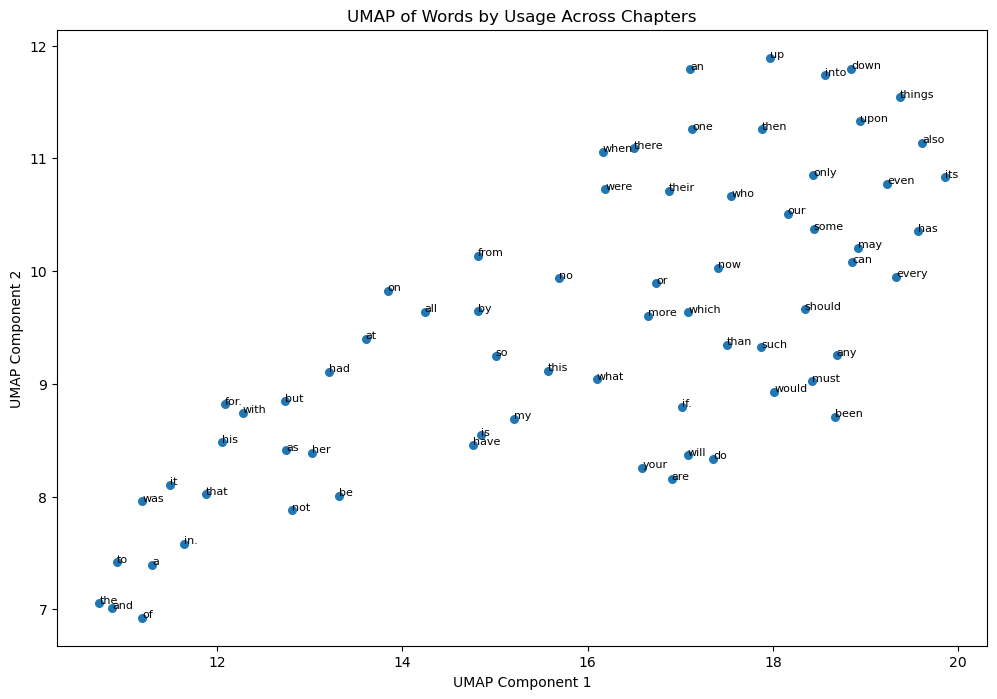

In [23]:
X_transpose = X.T
X_transpose = X_transpose.rename(columns = {i:f'Chapter{i}' for i in range(df.shape[0])})

# Step 1: Convert to NumPy
X_words = X_transpose.to_numpy()

# Step 2: Fit UMAP
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, random_state=42)
X_words_umap = umap_model.fit_transform(X_words)

# Step 3: Plot
plt.figure(figsize=(12, 8))
plt.scatter(X_words_umap[:, 0], X_words_umap[:, 1], s=30)

# Optional: label words
for i, word in enumerate(X_transpose.index):
    plt.text(X_words_umap[i, 0], X_words_umap[i, 1], word, fontsize=8)

plt.title("UMAP of Words by Usage Across Chapters")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()
